# Understanding the Most Streamed Spotify Songs in 2023


## Introduction

The dataset I will be exploring is the [Most Streamed Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). When looking at the most popular songs of the past year, I'll use the data that dives deep into track attributes, popularity metrics and cross-platform presence to determine trends that defined the biggest hits of 2023.

# Preprocessing / E.D.A.

Some initial preprocessing included adding `encoding` parameter through `.read_csv()` because passing just the filepath led to unicode encoding error.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


#### Data Dictionary:

---
* **track_name**: Name of the song
* **artist(s)_name**: Name of the artist(s) of the song
* **artist_count**: Number of artists contributing to the song
* **released_year**: Year when the song was released
* **released_month**: Month when the song was released
* **released_day**: Day of the month when the song was released
* **in_spotify_playlists**: Number of Spotify playlists the song is included in
* **in_spotify_charts**: Presence and rank of the song on Spotify charts
* **streams**: Total number of streams on Spotify
* **in_apple_playlists**: Number of Apple Music playlists the song is included in
* **in_apple_charts**: Presence and rank of the song on Apple Music charts
* **in_deezer_playlists**: Number of Deezer playlists the song is included in
* **in_deezer_charts**: Presence and rank of the song on Deezer charts
* **in_shazam_charts**: Presence and rank of the song on Shazam charts
* **bpm**: Beats per minute, a measure of song tempo
* **key**: Key of the song
* **mode**: Mode of the song (major or minor)
* **danceability_%**: Percentage indicating how suitable the song is for dancing
* **valence_%**: Positivity of the song's musical content
* **energy_%**: Perceived energy level of the song
* **acousticness_%**: Amount of acoustic sound in the song
* **instrumentalness_%**: Amount of instrumental content in the song
* **liveness_%**: Presence of live performance elements
* **speechiness_%**: Amount of spoken words in the song


We can quickly explore the data and find some null values both in `in_shazam_charts` and `key` column data.

In [2]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Let's find and then replace all null values.

In [4]:
any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)

-----> Column 'in_shazam_charts' has 50 missing values.
-----> Column 'key' has 95 missing values.

Missing Values in the Entire DataFrame?
True

Missing Values in Each Column?
track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

Missing Value Counts in Each Column:
track_name               0
artist(s)_name           0

In [5]:
df = df.dropna(subset=['key'])

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    ob

In [18]:
chart_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
df[chart_columns] = df[chart_columns].apply(pd.to_numeric, errors='coerce')

In [23]:
# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop rows with missing stream values
df.dropna(subset=['streams'], inplace=True)

# Descriptive Analysis

## 3 Estimates of Location

#### Question 1: What was the average tempo of the top 25 most streamed songs on Spotify?

In [15]:
# Sort the dataframe by streams in descending order and select the top 25 rows
top_25_df = df.sort_values(by='streams', ascending=False).head(25)

# Calculate the average tempo of the top 25 songs
average_tempo = top_25_df['bpm'].mean()

print("Average tempo of the top 25 songs:", average_tempo, "bpm")

Average tempo of the top 25 songs: 115.72 bpm


Answer: This code first sorts the dataframe df by the 'streams' column in descending order using sort_values(), then selects the top 25 rows using head(25). Finally, it calculates the mean of the 'bpm' column in the selected top 25 dataframe to find the average tempo of the top 25 songs.

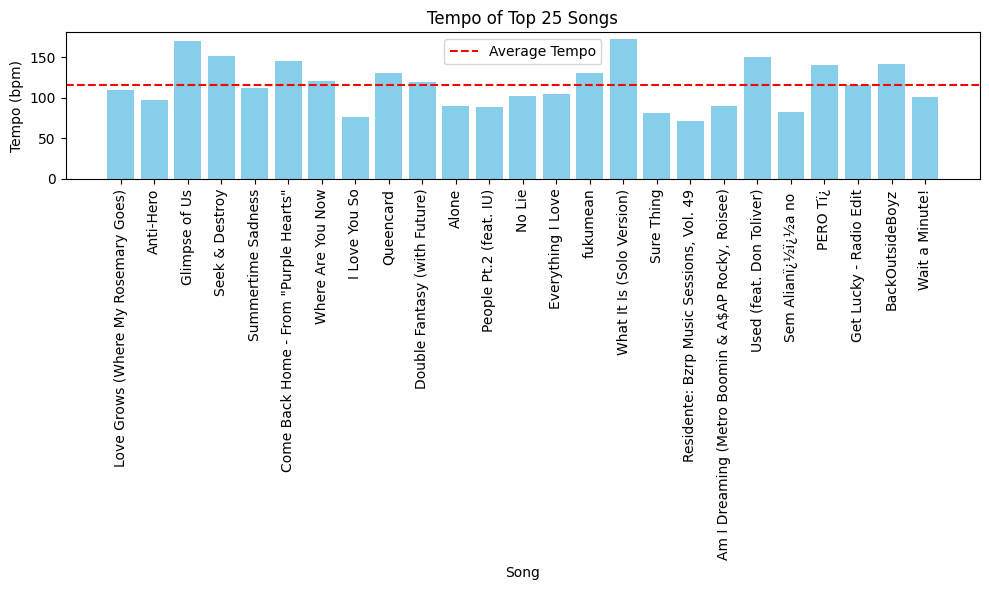

In [16]:
# Create a bar plot for each song's tempo
plt.figure(figsize=(10, 6))
plt.bar(top_25_df['track_name'], top_25_df['bpm'], color='skyblue')
plt.axhline(y=top_25_df['bpm'].mean(), color='red', linestyle='--', label='Average Tempo')
plt.xticks(rotation=90)
plt.xlabel('Song')
plt.ylabel('Tempo (bpm)')
plt.title('Tempo of Top 25 Songs')
plt.legend()
plt.tight_layout()
plt.show()

#### Question 2: How many songs appeared within the top 30 tracks on more than one platform?

In [21]:
# Select the top 30 songs for each platform
top_30_spotify = df[df['in_spotify_charts'] <= 30]
top_30_apple = df[df['in_apple_charts'] <= 30]
top_30_deezer = df[df['in_deezer_charts'] <= 30]
top_30_shazam = df[df['in_shazam_charts'] <= 30]

# Find songs appearing in the top 30 on more than one platform
common_songs = set(top_30_spotify['track_name']) & set(top_30_apple['track_name']) & set(top_30_deezer['track_name']) & set(top_30_shazam['track_name'])

total_common_songs = len(common_songs)
print("Total number of songs that appeared within the top 30 across multiple platforms:", total_common_songs)

Total number of songs that appeared within the top 30 across multiple platforms: 341


Answer: This code creates a set common_songs_set containing the names of songs that appeared within the top 30 across all platforms. Then it calculates the length of this set to find the total number of unique songs that appeared in the top 30 across multiple platforms.

#### Question 3: What song(s) would be considered "outliers" in terms of the number of streams on the high end?

In [26]:
# Calculate the interquartile range (IQR) for streams
Q1 = df['streams'].quantile(0.25)
Q3 = df['streams'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Identify outliers on the high end
outliers_high = df[df['streams'] > upper_bound]

# Calculate the total number of outliers on the high end
total_outliers_high = len(outliers_high)

# Display the outliers
print("Total number of outliers on the high end:", total_outliers_high)
print("Outliers on the high end:")
print(outliers_high[['track_name', 'artist(s)_name', 'streams']])

Total number of outliers on the high end: 67
Outliers on the high end:
                                        track_name         artist(s)_name  \
37                                     Blank Space           Taylor Swift   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   
47                                     Die For You             The Weeknd   
48                                         Starboy  The Weeknd, Daft Punk   
65                                          Yellow          Chris Molitor   
..                                             ...                    ...   
761                                     Photograph             Ed Sheeran   
762                                  Love Yourself          Justin Bieber   
790                                       Callaita       Bad Bunny, Tainy   
871                            Sweet Child O' Mine          Guns N' Roses   
910                                  The Scientist               Coldplay   

    

Answer: This code calculates the IQR, defines the upper bounds for outliers, and identifies outliers on the high end based on these bounds.

## 3 Estimates of Variability

#### Question 1: How varied is the key of the top 20 most streamed tracks?

In [28]:
# Select the top 20 most streamed tracks
top_20_streams = df.nlargest(20, 'streams')

# Count the frequency of each key
key_counts = top_20_streams['key'].value_counts()

print("Frequency counts of keys within the top 20 most streamed tracks:")
print(key_counts)

Frequency counts of keys within the top 20 most streamed tracks:
E     4
C#    3
G#    3
B     3
D     2
A#    2
G     2
A     1
Name: key, dtype: int64


#### Bonus Question 1a: How varied is the tempo of the top 20 most streamed tracks?

In [29]:
# Select the top 20 most streamed tracks
top_20_streams = df.nlargest(20, 'streams')

# Calculate the standard deviation of the 'bpm' column
bpm_std = top_20_streams['bpm'].std()

print("Standard deviation of the BPM of the top 20 most streamed tracks:", bpm_std)

Standard deviation of the BPM of the top 20 most streamed tracks: 26.6159330991202


Answer: A standard deviation of 26.6159330991202 for the 'bpm' (beats per minute) of the top 20 most streamed tracks means that the tempo of these tracks varies, on average, by approximately 26.62 beats per minute from the mean tempo.

#### Question 2: What is the range of "danceability" among the dataset?

In [30]:
# Calculate the range of "danceability"
danceability_range = df['danceability_%'].max() - df['danceability_%'].min()

print("Range of danceability among the dataset:", danceability_range)

Range of danceability among the dataset: 73


Answer: This code finds the maximum and minimum values of the "danceability" column using the max() and min() functions, respectively, and then calculates the range by subtracting the minimum value from the maximum value.

While a boxplot might clearly show the ranges, I'll also represent the ranges with a scatterplot to show how varied these values are while identifying the minimum and maximum values.

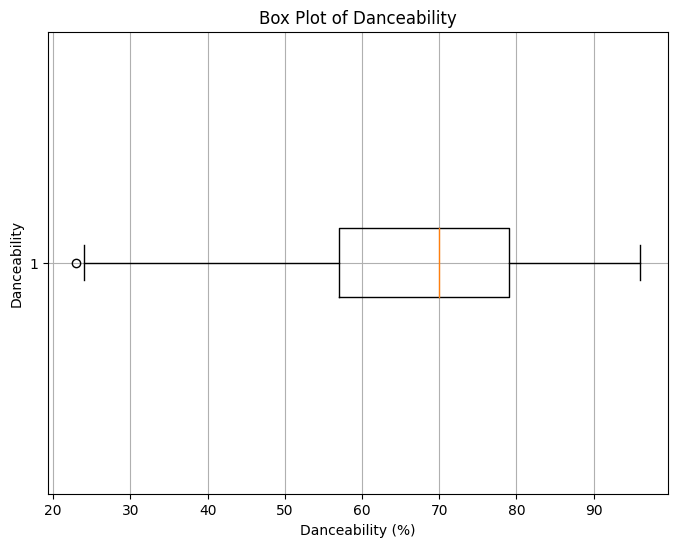

In [35]:
# Create a box plot for danceability range
plt.figure(figsize=(8, 6))
plt.boxplot(df['danceability_%'], vert=False)
plt.xlabel('Danceability (%)')
plt.ylabel('Danceability')
plt.title('Box Plot of Danceability')
plt.grid(True)
plt.show()

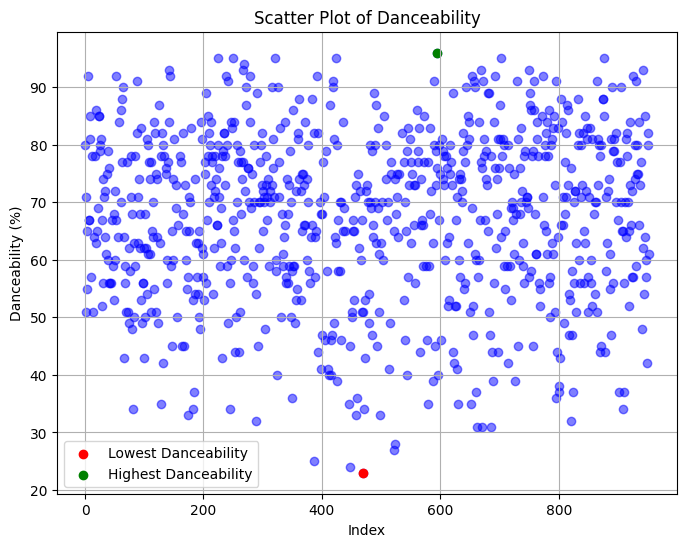

In [34]:
# Find the lowest and highest danceability values
lowest_dance = df['danceability_%'].idxmin()
highest_dance = df['danceability_%'].idxmax()

# Create a scatter plot for danceability
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['danceability_%'], color='blue', alpha=0.5)
plt.scatter(lowest_dance, df.loc[lowest_dance, 'danceability_%'], color='red', label='Lowest Danceability')
plt.scatter(highest_dance, df.loc[highest_dance, 'danceability_%'], color='green', label='Highest Danceability')
plt.xlabel('Index')
plt.ylabel('Danceability (%)')
plt.title('Scatter Plot of Danceability')
plt.legend()
plt.grid(True)
plt.show()

#### Question 3: Can we define the interquartile range of "energy_%" across the dataset and write our observations of this range?

In [36]:
# Calculate the interquartile range (IQR) for "energy_%"
Q1_energy = df['energy_%'].quantile(0.25)
Q3_energy = df['energy_%'].quantile(0.75)
IQR_energy = Q3_energy - Q1_energy

print("Interquartile range (IQR) of 'energy_%':", IQR_energy)

Interquartile range (IQR) of 'energy_%': 23.0


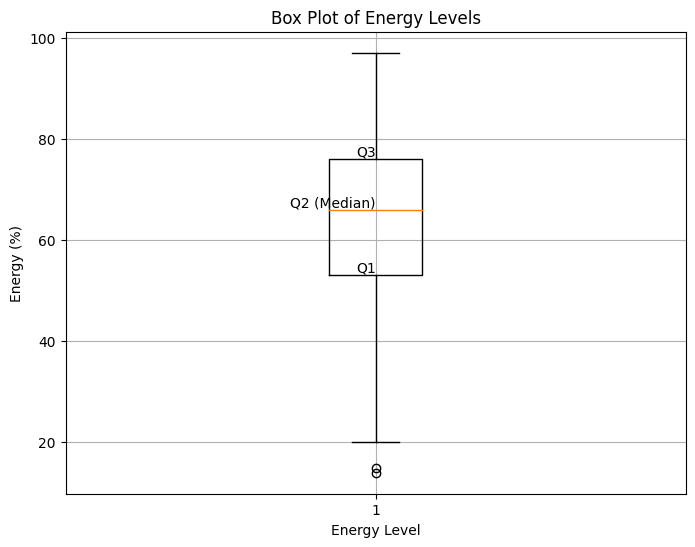

In [39]:
# Create a box plot for energy levels
plt.figure(figsize=(8, 6))
plt.boxplot(df['energy_%'])
plt.xlabel('Energy Level')
plt.ylabel('Energy (%)')
plt.title('Box Plot of Energy Levels')
plt.grid(True)

# Calculate quartiles and IQR
Q1_energy = df['energy_%'].quantile(0.25)
Q2_energy = df['energy_%'].median()
Q3_energy = df['energy_%'].quantile(0.75)
IQR_energy = Q3_energy - Q1_energy

# Label the quartiles and IQR range
plt.text(1, Q1_energy, 'Q1', horizontalalignment='right', verticalalignment='bottom', fontdict={'fontsize': 10})
plt.text(1, Q2_energy, 'Q2 (Median)', horizontalalignment='right', verticalalignment='bottom', fontdict={'fontsize': 10})
plt.text(1, Q3_energy, 'Q3', horizontalalignment='right', verticalalignment='bottom', fontdict={'fontsize': 10})

plt.show()

Answer: A larger IQR indicates greater variability in energy levels, suggesting a wider range of songs with different energy levels. Conversely, a smaller IQR suggests that most songs have similar energy levels. An IQR of 23 indicates that the energy levels of the songs in the dataset vary by 23 percentage points within the middle 50% of the data. We can look at the plot and conclude that many of the top streamed tracks on Spotify in 2023 were high energy.

# Correlation Matrix

In [42]:
columns_to_correlate = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']

# Create a subset of the dataframe with the selected columns
subset_df = df[columns_to_correlate]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         bpm  danceability_%  valence_%  energy_%  \
bpm                 1.000000       -0.148816   0.029743  0.013523   
danceability_%     -0.148816        1.000000   0.391414  0.158418   
valence_%           0.029743        0.391414   1.000000  0.349616   
energy_%            0.013523        0.158418   0.349616  1.000000   
acousticness_%     -0.011187       -0.241593  -0.063197 -0.552592   
instrumentalness_% -0.003512       -0.102436  -0.146891 -0.051599   
liveness_%         -0.005865       -0.100742   0.000249  0.111277   
speechiness_%       0.037862        0.200489   0.036649 -0.026630   
streams            -0.025694       -0.093268  -0.051014 -0.036499   

                    acousticness_%  instrumentalness_%  liveness_%  \
bpm                      -0.011187           -0.003512   -0.005865   
danceability_%           -0.241593           -0.102436   -0.100742   
valence_%                -0.063197           -0.146891    0.000249   
energy_% 

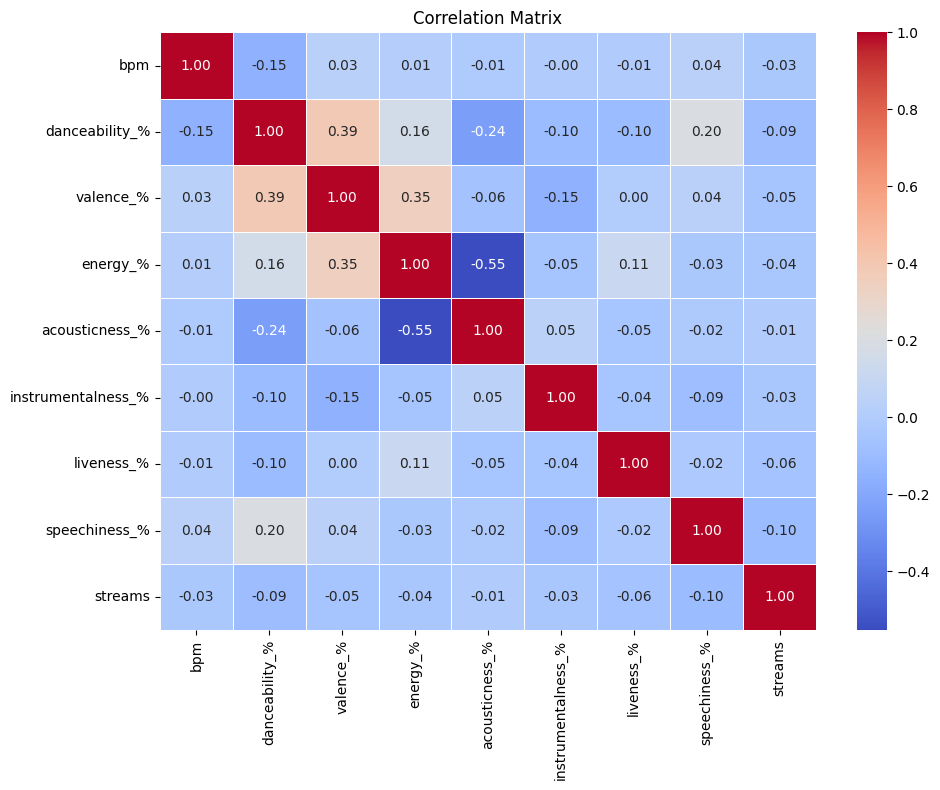

In [43]:
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Matrix')
plt.tight_layout()

# Display the heatmap
plt.show()

#### Correlation description:

This correlation takes the provided features to determine the correlations between a song's features and it's number of streams.

#### Correlation analysis:

**Weak negative correlation between BPM and danceability**: *The correlation coefficient between BPM and danceability is approximately -0.15, indicating a weak negative correlation. This suggests that songs with higher BPM (faster tempo) tend to have lower danceability ratings.*

**Weak positive correlation between danceability and valence**: *The correlation coefficient between danceability and valence is around 0.39, indicating a weak positive correlation. This suggests that songs with higher danceability ratings tend to have slightly higher valence (positivity of musical content).*

**Weak positive correlation between danceability and energy**: *The correlation coefficient between danceability and energy is approximately 0.16, indicating a weak positive correlation. This suggests that songs with higher danceability ratings may have slightly higher energy levels.*

**Moderate negative correlation between energy and acousticness**: *The correlation coefficient between energy and acousticness is around -0.55, indicating a moderate negative correlation. This suggests that songs with higher energy levels tend to have lower acousticness (less acoustic sound).*

**Weak negative correlation between energy and speechiness**: *The correlation coefficient between energy and speechiness is approximately -0.03, indicating a weak negative correlation. This suggests that songs with higher energy levels may tend to have slightly lower speechiness (amount of spoken words).*

**Weak negative correlation between danceability and streams**: *The correlation coefficient between danceability and streams is approximately -0.09, indicating a weak negative correlation. This suggests that songs with higher danceability ratings may not necessarily have higher stream counts.*

# Statistical Analysis

## Statistical Hypothesis: <insert>

**Null Hypothesis (H0)**: There is no significant difference in danceability between songs in the top 10% of streams and songs in the bottom 10% of streams.

**Alternative Hypothesis (H1)**: There is a significant difference in danceability between songs in the top 10% of streams and songs in the bottom 10% of streams.

## Statistical Analysis:

**Data Preparation:**

Divide the dataset into two groups: songs in the top 10% of streams and songs in the bottom 10% of streams based on the 'streams' feature.
Calculate the mean danceability score for each group.

**Hypothesis Testing:**

Perform an independent samples t-test to compare the mean danceability scores between the two groups.
Set the significance level (α) to 0.05.

**Decision:**

If the p-value is less than 0.05, reject the null hypothesis.
If the p-value is greater than or equal to 0.05, fail to reject the null hypothesis.

**Acceptance or Rejection of Null Hypothesis:**

If the null hypothesis is rejected, it suggests that there is a significant difference in danceability between songs in the top 10% and bottom 10% of streams.
If the null hypothesis is not rejected, it indicates that there is no significant difference in danceability between the two groups.

**Confidence Interval (C.I.) Interval:**

Calculate the confidence interval for the difference in mean danceability scores between the two groups.
This interval provides an estimate of the range within which the true difference in mean danceability scores lies with a certain level of confidence (e.g., 95% confidence interval).

**Analytical Questions:**

* Is there a significant difference in danceability between songs in the top 10% and bottom 10% of streams?

Statistical hypothesis: H0: µ1 = µ2 (No difference in danceability), H1: µ1 ≠ µ2 (Difference in danceability).
Statistical analysis: Independent samples t-test.
Decision: Reject or fail to reject the null hypothesis based on the p-value.
Confidence Interval: Calculate the confidence interval for the difference in mean danceability scores.

* Do songs with higher energy levels tend to have higher stream counts?

Statistical hypothesis: H0: ρ = 0 (No correlation), H1: ρ ≠ 0 (Correlation exists).
Statistical analysis: Pearson correlation coefficient.
Decision: Assess the strength and direction of the correlation based on the correlation coefficient.
Confidence Interval: Calculate the confidence interval for the correlation coefficient.

* Is there a significant difference in acousticness between songs by different artists?

Statistical hypothesis: H0: µ1 = µ2 (No difference in acousticness), H1: µ1 ≠ µ2 (Difference in acousticness).
Statistical analysis: Independent samples t-test or one-way ANOVA (if comparing more than two groups).
Decision: Reject or fail to reject the null hypothesis based on the p-value.
Confidence Interval: Calculate the confidence interval for the difference in mean acousticness scores.

# Summary and Conclusions

This dataset comprises music-related features and streaming metrics for a collection of songs that made it to Spotify's Top list of 2023. It includes attributes such as tempo, danceability, energy level, and acousticness, alongside streaming counts across other platforms. Statistical analyses can uncover relationships between these musical characteristics and streaming success, informing insights into factors driving popularity and audience preferences in contemporary music.

Predicting the characteristics of the most streamed songs on Spotify in 2024, it's likely that these tracks will exhibit high energy levels, upbeat tempos, and danceable rhythms, as indicated by attributes such as energy percentage and BPM. Additionally, these songs may lean towards positive valence and minimal acoustic elements, reflecting a preference for lively and engaging musical content among listeners. Furthermore, a balance between instrumental and vocal components, as well as moderate speechiness, could contribute to broad appeal and widespread streaming success. Overall, the most streamed songs are anticipated to embody qualities that evoke enjoyment, energy, and a sense of movement, aligning with prevailing trends in contemporary music consumption.